# Box-Cos

# A Box Cox is a transformation of non-normal dependent variables into a normal shape.

<img src="pix/box.png">

# Box-Cos are convert from NOn-Distribution Data to Distribution Data 

* # The exponent here is a variable called lambda. that varies over the range of `-5 to 5`
* # and in the process of searching, we exmine all value of lambda.
* # Finally we choose the optimal value (resulting in the best approximation to a normal distribution for your variable)

# Box - Cox are not working on zero and -ve (negative) Numbers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
data  = pd.read_csv("concrete_data.csv")


In [4]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
data.shape

(1030, 9)

# Check Missing values

In [6]:
data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

# Check 0 and -ve values

In [7]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Negative values are not in data set but 0 values are founds in 
* # Blast Furnace Slag 	
* # Fly Ash
* # Superplasticizer
* # Age

## Split Data 

In [8]:
# strength
x = data.drop(columns=["Strength"])
y = data.iloc[:,-1]

In [9]:
print("y",y.shape)
print("x",x.shape)

y (1030,)
x (1030, 8)


In [10]:
X_train, X_test , Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Apply LinerRegression without transform

In [11]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

# Prediction

In [12]:
y_pred = lr.predict(X_test)

# r2 score

In [13]:
R2_NORMAL = r2_score(Y_test,y_pred)

# Cross Validation

In [14]:
lr = LinearRegression()
CROS_VAL_NORMAL = np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10))

In [15]:
print("NORMAL R2 :\t\t",R2_NORMAL)
print("NORMAL CROSS_VAL\t",CROS_VAL_NORMAL)

NORMAL R2 :		 0.6275531792314853
NORMAL CROSS_VAL	 0.27820729160873786


### `Cross Validation are very low value`

# Bad Data
* ## Blast Furnace Slag (Right-Skewed)
* ## Fly Ash (By-Model)
* ## Superplasticizer (Right-Skewed and By Model)
* ## Age

# Handle 0 value

In [16]:
X_train_new = X_train+0.000001
X_test_new = X_test+0.000001

# Applying Box-Cox

* ### PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

<br>
   
   * ###  standardizebool, default=True
        * ### means automatic Scale Data

<br>
   
   * ### ‘yeo-johnson’ [1], works with positive and negative values
   * ### ‘box-cox’ [2], only works with strictly positive values
       * ### default method is YEO-Johnson

In [17]:
ptr_BOX = PowerTransformer(method="box-cox")

In [18]:
X_TR_BOX = ptr_BOX.fit(X_train_new)

In [19]:
X_TR_BOX = ptr_BOX.transform(X_train_new)
X_TS_BOX = ptr_BOX.transform(X_test_new)

# Lambda Values for all columns

In [20]:
ptr_BOX.lambdas_

array([ 0.17702534,  0.02509305, -0.03897048,  0.77268163,  0.09881088,
        1.12981334,  1.78201858,  0.06663092])

# Calculation working on lambda Values

In [21]:
pd.DataFrame({"colums":X_test_new.columns,"box-cos lambda value":ptr_BOX.lambdas_})

,colums,box-cos lambda value
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [22]:
X_TR_BOX = pd.DataFrame(X_TR_BOX,columns=X_train.columns)
X_TS_BOX = pd.DataFrame(X_TS_BOX,columns=X_test.columns)

# Apply Linear Regression Again

In [23]:
lr_BOX = LinearRegression()
lr_BOX.fit(X_TR_BOX,Y_train)

LinearRegression()

# Predection

In [24]:
y_pred_BOX = lr_BOX.predict(X_TS_BOX)

# r2 Score

In [25]:
R2_BOX = r2_score(Y_test,y_pred_BOX)

# Cross Validation

In [26]:
ptr_BOX = PowerTransformer(method="box-cox")
X_BOX = ptr_BOX.fit_transform(x+0.0000001)

lr_BOX_C = LinearRegression()
CROS_VAL_BOX = np.mean(cross_val_score(lr,X_BOX,y,scoring='r2',cv=10))

In [27]:
print("NORMAL R2 :\t\t",R2_NORMAL)
print("NORMAL CROSS_VAL\t",CROS_VAL_NORMAL)
print()
print("BOX-COS R2 :\t\t",R2_BOX)
print("BOS-COS CROSS_VAL\t",CROS_VAL_BOX)

NORMAL R2 :		 0.6275531792314853
NORMAL CROSS_VAL	 0.27820729160873786

BOX-COS R2 :		 0.8047825006181188
BOS-COS CROSS_VAL	 0.6461240350673344


# Graphs Before and After Box-Cos

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


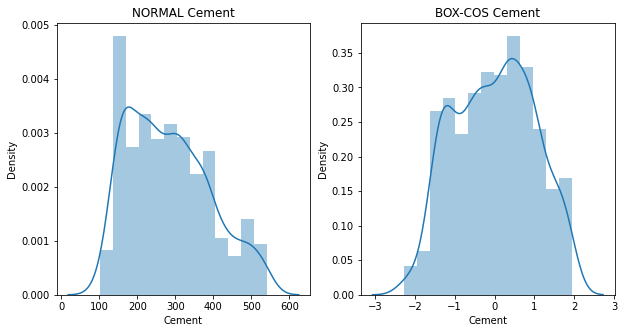

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


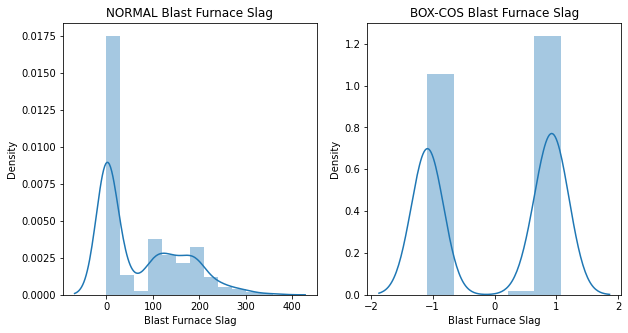

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


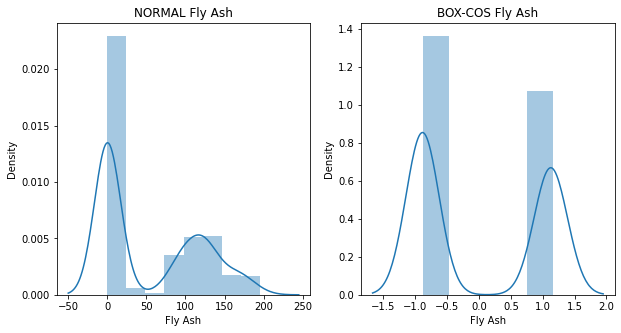

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


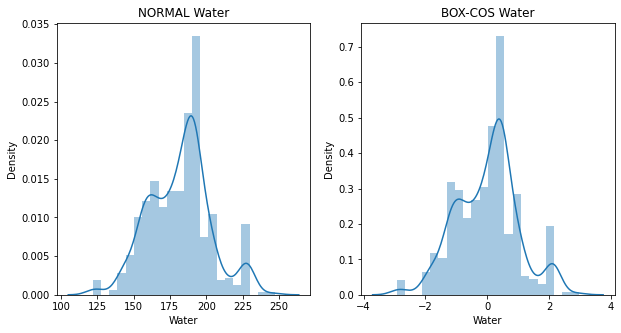

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


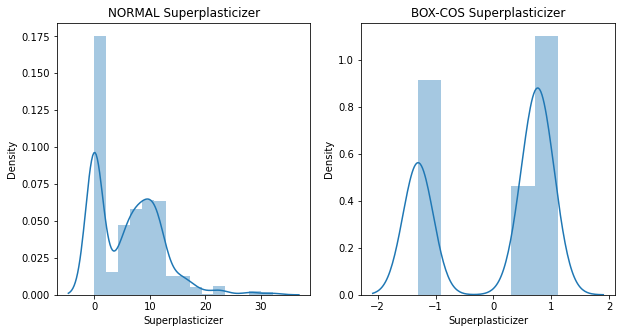

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


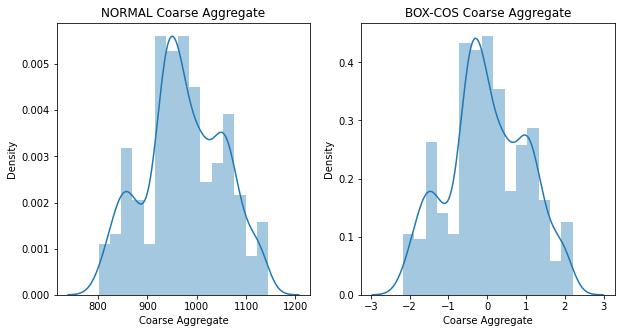

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


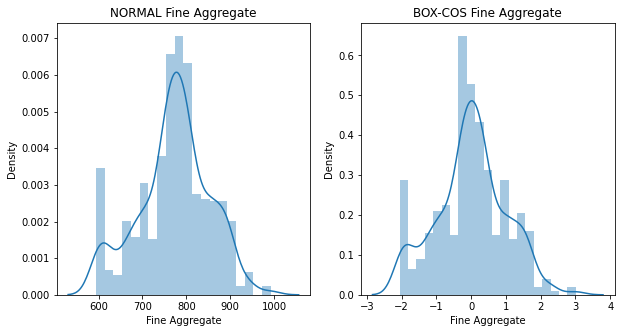

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


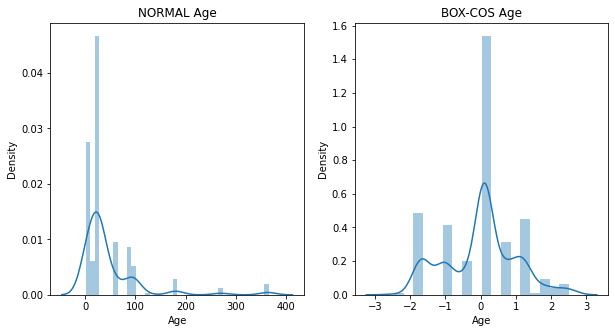

In [28]:
for i in X_train.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.distplot(X_train[i])
    plt.title("NORMAL "+i)
    
    plt.subplot(122)
    sns.distplot(X_TR_BOX[i])
    plt.title("BOX-COS "+i)
    
    
    
    plt.show()

# Appling Yeo JohnSOn

## Note In PowerTransformer default method is yoe JohnSon

## Yoe JohnSon Automatic Handle 0, -ve values

In [29]:
ptr_YEO = PowerTransformer()

In [30]:
X_TR_YEO = ptr_YEO.fit(X_train)

In [31]:
X_TR_YEO = ptr_YEO.transform(X_train)
X_TS_YEO = ptr_YEO.transform(X_test)

In [32]:
X_TR_YEO = pd.DataFrame(X_TR_YEO,columns=X_train.columns)
X_TS_YEO = pd.DataFrame(X_TS_YEO,columns=X_test.columns)

# Apply LinerRegression on Yeo JohnSon

In [33]:
lr_YEO = LinearRegression()
lr_YEO.fit(X_TR_YEO,Y_train)

LinearRegression()

# Predection

In [34]:
y_pred_YEO = lr_BOX.predict(X_TS_YEO)

# r2 Score

In [35]:
R2_YEO = r2_score(Y_test,y_pred_YEO)

# Cross Validation

In [36]:
ptr_YEO = PowerTransformer()
X_YEO = ptr_YEO.fit_transform(x+0.0000001)

lr_YEO_C = LinearRegression()
CROS_VAL_YEO = np.mean(cross_val_score(lr,X_YEO,y,scoring='r2',cv=10))

In [37]:
print("NORMAL R2 :\t\t",R2_NORMAL)
print("NORMAL CROSS_VAL\t",CROS_VAL_NORMAL)
print()
print("BOX-COS R2 :\t\t",R2_BOX)
print("BOS-COS CROSS_VAL\t",CROS_VAL_BOX)

print()
print("YEO R2 :\t\t",R2_YEO)
print("YEO CROSS_VAL\t\t",CROS_VAL_YEO)

NORMAL R2 :		 0.6275531792314853
NORMAL CROSS_VAL	 0.27820729160873786

BOX-COS R2 :		 0.8047825006181188
BOS-COS CROSS_VAL	 0.6461240350673344

YEO R2 :		 0.8009983595233947
YEO CROSS_VAL		 0.6586548631311384


# Graph Box-Cos and Yeo JohnSon

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


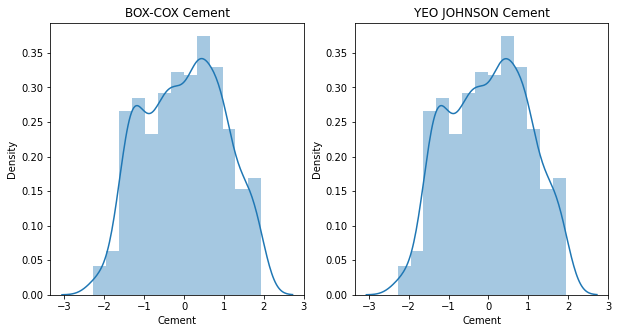

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


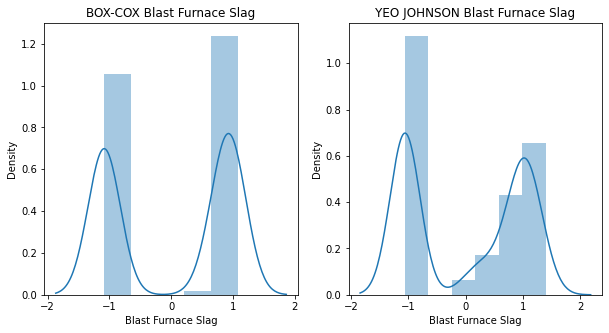

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


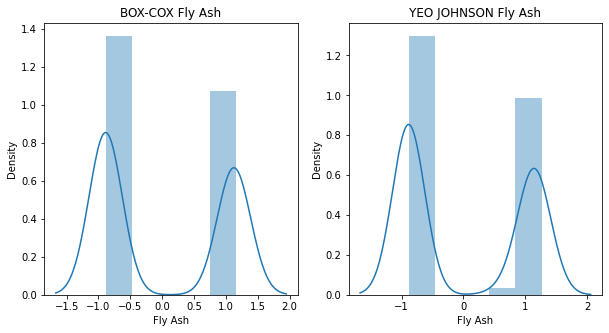

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


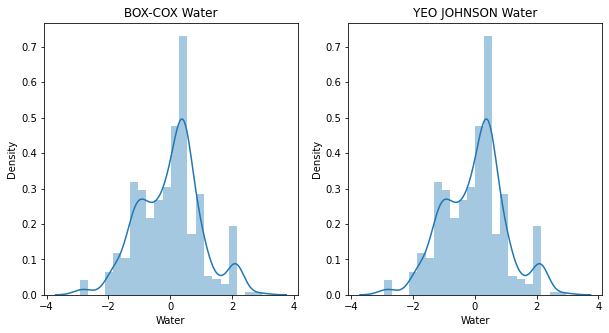

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


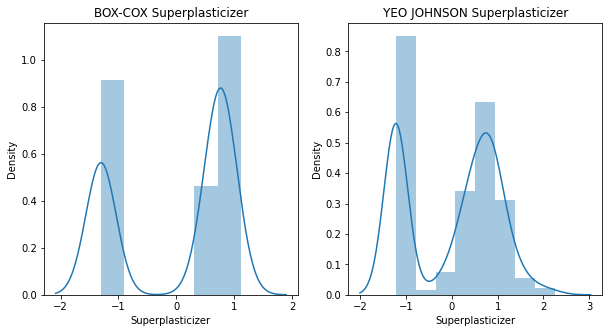

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


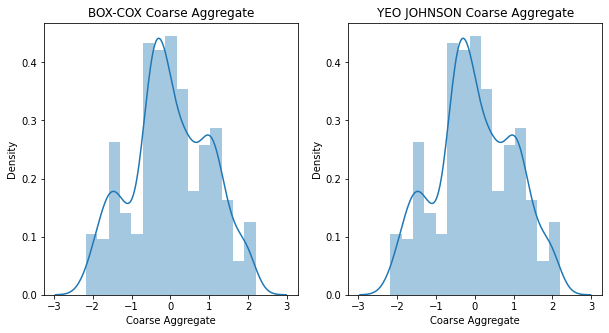

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


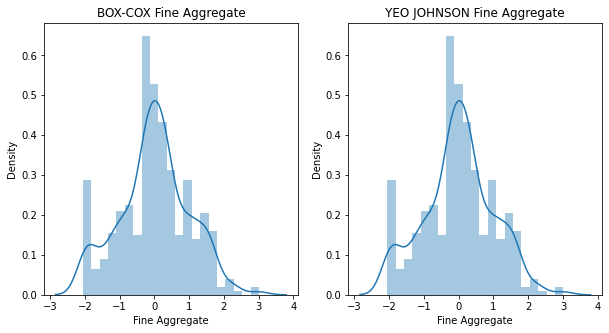

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


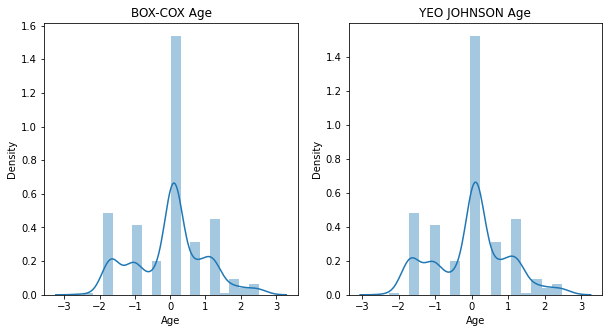

In [38]:
for i in X_TR_BOX.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.distplot(X_TR_BOX[i])
    plt.title("BOX-COX "+i)
    
    plt.subplot(122)
    sns.distplot(X_TR_YEO[i])
    plt.title("YEO JOHNSON "+i)
    
    
    
    plt.show()

# Yeo Johnson are better than Box-Cox

# lambda value of Both

In [39]:
pd.DataFrame(
    {
        "colums":X_TR_BOX.columns,
        "box-cos lambda value":ptr_BOX.lambdas_,
        "Yeo Johnson Lambda values":ptr_YEO.lambdas_
    }
)

,colums,box-cos lambda value,Yeo Johnson Lambda values
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.022924,0.016633
2,Fly Ash,-0.028797,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.087911,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830764
7,Age,0.048975,0.001771
